In [1]:
import pandas as pd 
df = pd.read_csv('housing_data.csv')

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isna().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
X = df.drop(columns= ['id', 'date', 'price'])
y = df['price']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [7]:
from sklearn.neighbors import KNeighborsRegressor 
knn = KNeighborsRegressor(n_neighbors= 5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [8]:
from sklearn.metrics import mean_absolute_error 
y_pred = knn.predict(X_test)
mean_absolute_error(y_pred, y_test)

155874.7099699283

In [12]:
def knn(k):
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return mean_absolute_error(y_pred, y_test)  

In [13]:
maes = []
for i in range(1, 40):
    maes.append(knn(i))    

In [14]:
maes

[192394.96946564884,
 169470.37462410363,
 163654.31074099778,
 159002.27827897292,
 155874.7099699283,
 153482.8702675611,
 151942.3130431909,
 151093.036808929,
 150106.73197625103,
 149786.07675225538,
 150496.6785271171,
 150450.74267483997,
 150163.48563141693,
 150042.78865536497,
 149918.15399799522,
 150284.23429909785,
 150321.5775264998,
 149986.30287608915,
 149988.7672547086,
 150178.9329400879,
 150382.51793838054,
 150565.5757365466,
 150447.0838186042,
 150626.60688950575,
 150750.3629886653,
 150924.73684585135,
 150969.22168247358,
 151163.16631142393,
 151322.4163535859,
 151213.32008635977,
 151756.219739876,
 151864.88800456858,
 151857.0109702157,
 152156.8023975725,
 152425.66627011664,
 152651.26964299483,
 152786.24528761933,
 153035.66853549558,
 153270.3334400968]

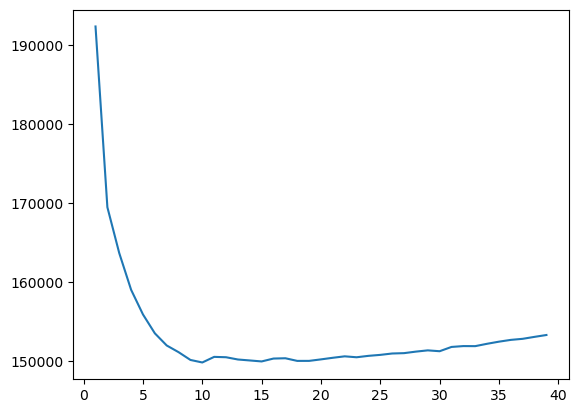

In [15]:
import matplotlib.pyplot as plt 
plt.plot(range(1, 40), maes)

In [16]:
knn = KNeighborsRegressor(n_neighbors= 10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mean_absolute_error(y_pred, y_test)

149786.07675225538